## 2a

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
import pandas as pd
from scipy.integrate import quad, trapezoid, simps
from scipy.stats import t, norm


LENGTHS = [10**3, 10**4, 10**5, 10**6,]
NORMAL_SEQ = []

S = 3900
K = 3900
y = 0.013
T = 1
r = 0.03
SIGMA = 0.25
MU__HAT = r - y - 0.5 * SIGMA**2

for n in LENGTHS:
    rs = RandomState(MT19937(SeedSequence(123456789)))
    u1 = rs.rand(n)
    u2 = rs.rand(n)
    NORMAL_SEQ_1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    NORMAL_SEQ.append(NORMAL_SEQ_1)

LOWER_S = K * np.exp(-SIGMA * 2 * np.sqrt(T))
UPPER_S = K * np.exp(SIGMA * 2 * np.sqrt(T))
LIST_OF_S_VALUES = np.linspace(LOWER_S, UPPER_S, 11)
LIST_OF_EPSILONS = [1e-1, 1e-2, 1e-3, ]

def BSM_PUT_PRICING(S, K, r, y, SIGMA, T):
    d1 = (np.log(S / K) + (r - y + 0.5 * SIGMA**2) * T) / (SIGMA * np.sqrt(T))
    d2 = d1 - SIGMA * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-y * T) * norm.cdf(-d1)

def BSM_PRICING(S, K, r, y, SIGMA, T):
    d1 = (np.log(S / K) + (r - y + 0.5 * SIGMA**2) * T) / (SIGMA * np.sqrt(T))
    d2 = d1 - SIGMA * np.sqrt(T)
    return S * np.exp(-y * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

ALPHA_VALUE = -0.5
EFF_Y = r - ALPHA_VALUE * ((r - y) + (ALPHA_VALUE - 1) * SIGMA**2 / 2)
SIGMA_eff = SIGMA * np.abs( ALPHA_VALUE)
THEORY_PRICE = 2 * K * np.sqrt(K) * BSM_PUT_PRICING(S**(-0.5), K**(-0.5), r, EFF_Y, SIGMA_eff, T)
print(f"The theoretical price is {THEORY_PRICE}")
ASC_BB_STANDARD_ERRORS = []
ASC_BB__ERRORS = []

for i, n in enumerate(LENGTHS):
    z = NORMAL_SEQ[i]
    S_T = S * np.exp((MU__HAT) * T + SIGMA * np.sqrt(T) * z)
    C_T = 2 * K * np.maximum(1 - np.sqrt(K/S_T), 0)
    C_t = np.mean(C_T) * np.exp(-r * T)
    C_t_std = np.std(C_T) * np.exp(-r * T) / np.sqrt(n)
    print(f"When n is {n} : ")
    print("||||||||||||||||||||||||||||||||||||||||")
    print(f"The mean is {C_t}")
    print(f"The std is {C_t_std}")
    print(f"The theoretical price is {THEORY_PRICE}")
    print(f"ACTUAL PRICE minus THEORETICAL PRICE is --> {C_t - THEORY_PRICE}")
    test_statistic = (C_t - THEORY_PRICE) / C_t_std
    p_value = t.sf(np.abs(test_statistic), n - 1) * 2
    print(f"The p value is {p_value}")
    print(f"Rejection of the null hypothesis at 5% level: {p_value < 0.05}")
    ASC_BB_STANDARD_ERRORS.append(C_t_std)
    ASC_BB__ERRORS.append(np.abs(C_t - THEORY_PRICE))


The theoretical price is 325.8139511039561
When n is 1000 : 
||||||||||||||||||||||||||||||||||||||||
The mean is 348.51982753587185
The std is 15.744779262250528
The theoretical price is 325.8139511039561
ACTUAL PRICE minus THEORETICAL PRICE is --> 22.705876431915783
The p value is 0.14958166695880104
Rejection of the null hypothesis at 5% level: False
When n is 10000 : 
||||||||||||||||||||||||||||||||||||||||
The mean is 336.49199639335046
The std is 4.8904886651610004
The theoretical price is 325.8139511039561
ACTUAL PRICE minus THEORETICAL PRICE is --> 10.67804528939439
The p value is 0.029027240729383102
Rejection of the null hypothesis at 5% level: True
When n is 100000 : 
||||||||||||||||||||||||||||||||||||||||
The mean is 324.2364983592081
The std is 1.5246078457787577
The theoretical price is 325.8139511039561
ACTUAL PRICE minus THEORETICAL PRICE is --> -1.5774527447479727
The p value is 0.3008296146329532
Rejection of the null hypothesis at 5% level: False
When n is 1000000

## 2b

In [ ]:
for i, n in enumerate(LENGTHS):
    z = NORMAL_SEQ[i]
    S_T = S * np.exp((MU__HAT) * T + SIGMA * np.sqrt(T) * z)
    C_T_ASC = 2 * K * np.maximum(1 - np.sqrt(K/S_T), 0)
    C_T = np.maximum(S_T - K, 0)
    SAMPLE_COVARIANCE = np.cov(C_T, C_T_ASC)
    SAMPLE_CORRELATION = np.corrcoef(C_T, C_T_ASC)

    print(f"When n is {n} : ")
    print("||||||||||||||||||||||||||||||||||||||||")
    print(f"The sample covariance is {SAMPLE_COVARIANCE[0, 1]}")
    print(f"The sample correlation is {SAMPLE_CORRELATION[0, 1]}")

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("A vanilla put is well-suited for hedging because its payoff exhibits a high correlation with the underlying asset's price.")

When n is 1000 : 
||||||||||||||||||||||||||||||||||||||||
The sample covariance is 371519.5248178606
The sample correlation is 0.9870231941172813
When n is 10000 : 
||||||||||||||||||||||||||||||||||||||||
The sample covariance is 352193.41848036065
The sample correlation is 0.989796050231984
When n is 100000 : 
||||||||||||||||||||||||||||||||||||||||
The sample covariance is 341988.3762274105
The sample correlation is 0.9893205298416202
When n is 1000000 : 
||||||||||||||||||||||||||||||||||||||||
The sample covariance is 340668.3931700713
The sample correlation is 0.9891528900907937
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
A vanilla put is well-suited for hedging because its payoff exhibits a high correlation with the underlying asset's price.


## 2c

When n is 1000 : 
||||||||||||||||||||||||||||||||||||||||
The standard error in the difference between the vanilla call & ASC is --> 7.622170338585376
When n is 10000 : 
||||||||||||||||||||||||||||||||||||||||
The standard error in the difference between the vanilla call & ASC is --> 2.192993823766799
When n is 100000 : 
||||||||||||||||||||||||||||||||||||||||
The standard error in the difference between the vanilla call & ASC is --> 0.6854262732525586
When n is 1000000 : 
||||||||||||||||||||||||||||||||||||||||
The standard error in the difference between the vanilla call & ASC is --> 0.21615689991666678


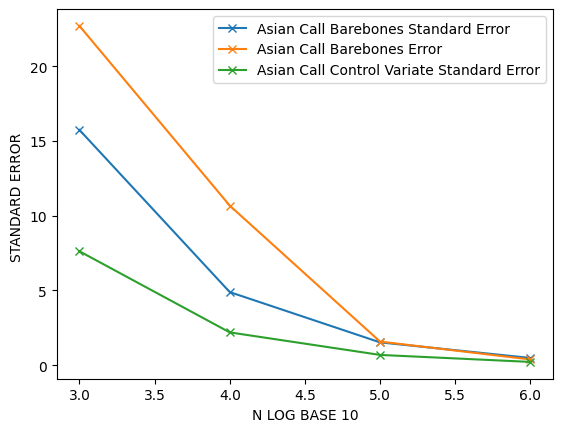

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The Efficiency Ratio is 0.41957172703773676


In [ ]:
CV_STANDARD_ERRORS = []
for i, n in enumerate(LENGTHS):
    z = NORMAL_SEQ[i]
    S_T = S * np.exp((MU__HAT) * T + SIGMA * np.sqrt(T) * z)
    C_T = np.maximum(S_T - K, 0)
    C_T_ASC = 2 * K * np.maximum(1 - np.sqrt(K/S_T), 0)
    F_T = C_T_ASC - C_T
    STANDARD_ERROR = np.std(F_T) / np.sqrt(n)
    print(f"When n is {n} : ")
    print("||||||||||||||||||||||||||||||||||||||||")
    print(f"The standard error in the difference between the vanilla call & ASC is --> {STANDARD_ERROR}")
    CV_STANDARD_ERRORS.append(STANDARD_ERROR)

plt.plot(np.log10(LENGTHS), (ASC_BB_STANDARD_ERRORS), '-x', label = "Asian Call Barebones Standard Error")
plt.plot(np.log10(LENGTHS), (ASC_BB__ERRORS), '-x', label = "Asian Call Barebones Error")
plt.plot(np.log10(LENGTHS), (CV_STANDARD_ERRORS), '-x', label = "Asian Call Control Variate Standard Error")
plt.ylabel("STANDARD ERROR ")
plt.xlabel("N LOG BASE 10")
plt.legend()
plt.show()

RATIO_OF_EFFICIENCY = 2 * np.square(np.array(CV_STANDARD_ERRORS) / np.array(ASC_BB_STANDARD_ERRORS))
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(f"The Efficiency Ratio is {RATIO_OF_EFFICIENCY.mean()}")

## 2d

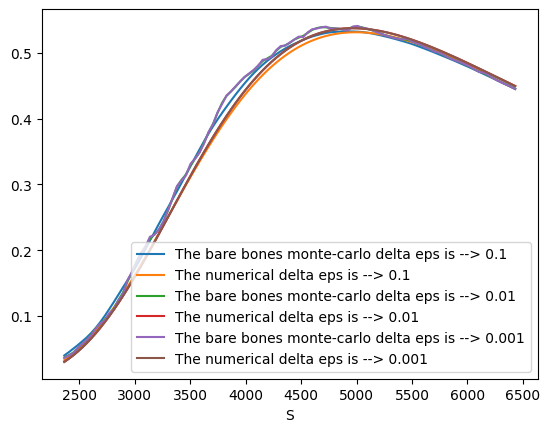

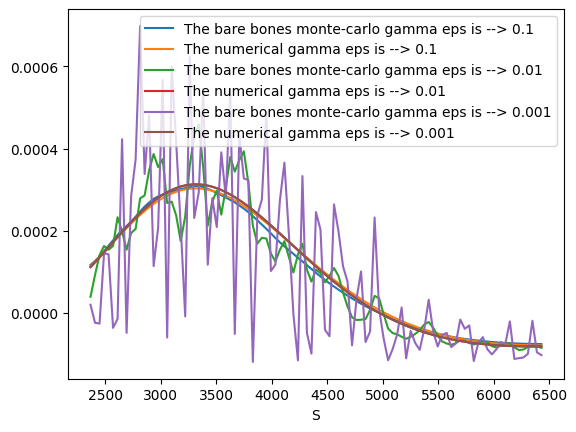

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
As we use smaller values of epsilon, the quantization effects become apparent. 
 The estimator is unbiased and smoothly fits the theoretical value for larger values of epsilon. 
 The quantization effects are more pronounced for gamma.


In [ ]:
def PRICING_CLOSED_FORM(S, K, r, y, SIGMA, T, ALPHA_VALUE = -0.5):
    EFF_Y = r - ALPHA_VALUE * ((r - y) + (ALPHA_VALUE - 1) * SIGMA**2 / 2)
    SIGMA_eff = SIGMA * np.abs(ALPHA_VALUE)
    THEORY_PRICE = 2 * K * np.sqrt(K) * BSM_PUT_PRICING(S**(-0.5), K**(-0.5), r, EFF_Y, SIGMA_eff, T)
    return THEORY_PRICE

def ASIAN_CALL_CENTRAL_NUMERICAL_DELTA(S, K, r, y, SIGMA, T, eps = 1e-3):
    return (PRICING_CLOSED_FORM(S * (1 + eps), K, r, y, SIGMA, T) - PRICING_CLOSED_FORM(S * (1 - eps), K, r, y, SIGMA, T)) / (2 * S * eps)

def numerical_gamma_ASC(S, K, r, y, SIGMA, T, eps = 1e-3):
    return (ASIAN_CALL_CENTRAL_NUMERICAL_DELTA(S * (1 + eps), K, r, y, SIGMA, T) - ASIAN_CALL_CENTRAL_NUMERICAL_DELTA(S * (1 - eps), K, r, y, SIGMA, T)) / (2 * S * eps)

def PRICING_MONTECARLO(S, K, r, y, SIGMA, T,):
    MU__HAT = r - y - 0.5 * SIGMA**2
    normal_sequence = NORMAL_SEQ[0]
    S_T = S * np.exp((MU__HAT) * T + SIGMA * np.sqrt(T) * normal_sequence)
    C_T = 2 * K * np.maximum(1 - np.sqrt(K/S_T), 0)
    C_t = np.mean(C_T) * np.exp(-r * T)
    return C_t

def DELTA_MONTECARLO(S, K, r, y, SIGMA, T, eps = 1e-3, ):
    return (PRICING_MONTECARLO(S * (1 + eps), K, r, y, SIGMA, T, ) - PRICING_MONTECARLO(S * (1 - eps), K, r, y, SIGMA, T, )) / (2 * S * eps)

def GAMMA_MONTECARLO(S, K, r, y, SIGMA, T, eps = 1e-3, ):
    return (DELTA_MONTECARLO(S * (1 + eps), K, r, y, SIGMA, T, eps, ) - DELTA_MONTECARLO(S * (1 - eps), K, r, y, SIGMA, T, eps, )) / (2 * S * eps)


LIST_OF_S_VALUES = np.linspace(LOWER_S, UPPER_S, 101)
LIST_OF_EPSILONS = [1e-1, 1e-2, 1e-3]
for idx, eps in enumerate(LIST_OF_EPSILONS):
    plt.plot(LIST_OF_S_VALUES, [DELTA_MONTECARLO(x, K, r, y, SIGMA, T, eps) for x in LIST_OF_S_VALUES], label = f"The bare bones monte-carlo delta eps is --> {eps}")
    plt.plot(LIST_OF_S_VALUES, [ASIAN_CALL_CENTRAL_NUMERICAL_DELTA(x, K, r, y, SIGMA, T, eps) for x in LIST_OF_S_VALUES], label = f"The numerical delta eps is --> {eps}")

plt.xlabel("S")
plt.legend()
plt.show()


LIST_OF_S_VALUES = np.linspace(LOWER_S, UPPER_S, 101)
LIST_OF_EPSILONS = [1e-1, 1e-2, 1e-3]
for idx, eps in enumerate(LIST_OF_EPSILONS):
    plt.plot(LIST_OF_S_VALUES, [GAMMA_MONTECARLO(x, K, r, y, SIGMA, T, eps) for x in LIST_OF_S_VALUES], label = f"The bare bones monte-carlo gamma eps is --> {eps}")
    plt.plot(LIST_OF_S_VALUES, [numerical_gamma_ASC(x, K, r, y, SIGMA, T, eps) for x in LIST_OF_S_VALUES], label = f"The numerical gamma eps is --> {eps}")

plt.xlabel("S")
plt.legend()
plt.show()

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("As we use smaller values of epsilon, the quantization effects become apparent. \n The estimator is unbiased and smoothly fits the theoretical value for larger values of epsilon. \n The quantization effects are more pronounced for gamma.")

## 2e

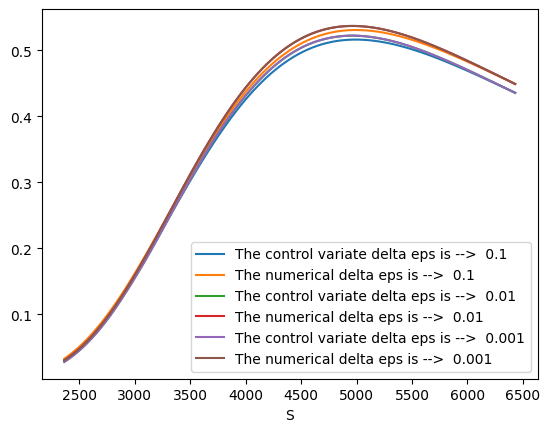

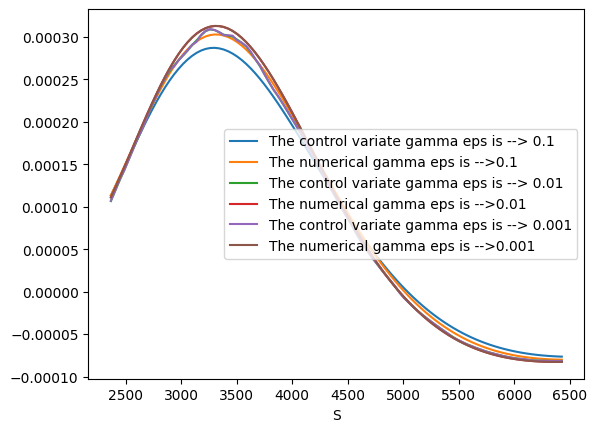

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
We don't see the same quantization effects we observed in Bare Bones Monte Carlo 
 because we've reduced the contribution of the random variable and substituted it with a deterministic variable. 
 This reduces the variance of the estimator and makes it more stable.


In [ ]:
def cv_PRICING_MONTECARLO(S, K, r, y, SIGMA, T, n = 10000):
    MU__HAT = r - y - 0.5 * SIGMA**2
    normal_sequence = NORMAL_SEQ[0]
    S_T = S * np.exp((MU__HAT) * T + SIGMA * np.sqrt(T) * normal_sequence)
    C_T = np.maximum(S_T - K, 0)
    C_T_ASC = 2 * K * np.maximum(1 - np.sqrt(K/S_T), 0)
    F_T = C_T_ASC - C_T
    C_t = np.mean(C_T) * np.exp(-r * T)
    F_t = np.mean(F_T) * np.exp(-r * T)
    F_t += BSM_PRICING(S, K, r, y, SIGMA, T)
    return F_t


def cv_DELTA_MONTECARLO(S, K, r, y, SIGMA, T, eps = 1e-3, ):
    return (cv_PRICING_MONTECARLO(S * (1 + eps), K, r, y, SIGMA, T, ) - cv_PRICING_MONTECARLO(S * (1 - eps), K, r, y, SIGMA, T, )) / (2 * S * eps)

def cv_GAMMA_MONTECARLO(S, K, r, y, SIGMA, T, eps = 1e-3, ):
    return (cv_DELTA_MONTECARLO(S * (1 + eps), K, r, y, SIGMA, T, eps, ) - cv_DELTA_MONTECARLO(S * (1 - eps), K, r, y, SIGMA, T, eps, )) / (2 * S * eps)

LIST_OF_S_VALUES = np.linspace(LOWER_S, UPPER_S, 101)
LIST_OF_EPSILONS = [1e-1, 1e-2, 1e-3]
for idx, eps in enumerate(LIST_OF_EPSILONS):
    plt.plot(LIST_OF_S_VALUES, [cv_DELTA_MONTECARLO(x, K, r, y, SIGMA, T, eps) for x in LIST_OF_S_VALUES], label = f"The control variate delta eps is -->  {eps}")
    plt.plot(LIST_OF_S_VALUES, [ASIAN_CALL_CENTRAL_NUMERICAL_DELTA(x, K, r, y, SIGMA, T, eps) for x in LIST_OF_S_VALUES], label = f"The numerical delta eps is -->  {eps}")

plt.xlabel("S")
plt.legend()
plt.show()

LIST_OF_S_VALUES = np.linspace(LOWER_S, UPPER_S, 101)
LIST_OF_EPSILONS = [1e-1, 1e-2, 1e-3]
for idx, eps in enumerate(LIST_OF_EPSILONS):
    plt.plot(LIST_OF_S_VALUES, [cv_GAMMA_MONTECARLO(x, K, r, y, SIGMA, T, eps) for x in LIST_OF_S_VALUES], label = f"The control variate gamma eps is --> {eps}")
    plt.plot(LIST_OF_S_VALUES, [numerical_gamma_ASC(x, K, r, y, SIGMA, T, eps) for x in LIST_OF_S_VALUES], label = f"The numerical gamma eps is -->{eps}")

plt.xlabel("S")
plt.legend()
plt.show()



print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("We don't see the same quantization effects we observed in Bare Bones Monte Carlo \n because we've reduced the contribution of the random variable and substituted it with a deterministic variable. \n This reduces the variance of the estimator and makes it more stable.")